# Lab: Mulitclass Classification

-  <b> Multiclass classification</b> means a classification task with more than two classes; e.g., classify a set of images of fruits which may be oranges, apples, or pears. Multiclass classification makes the assumption that each sample is assigned to one and only one label: a fruit can be either an apple or a pear but not both at the same time. 
- In our case, We use [Cover type dataset]( https://archive.ics.uci.edu/ml/datasets/covertype) and  this dataset contains tree observations from four areas of the Roosevelt National Forest in Colorado. All observations are cartographic variables (no remote sensing) from 30 meter x 30 meter sections of forest. There are over half a million measurements total! This dataset includes information on tree type, shadow coverage, distance to nearby landmarks (roads etcetera), soil type, and local topography.
- <b>Our purpose is to predict  forest cover type.</b>

## Import required packages

Import some libraries and examining the data.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

1.15.0


## Covertype Data Set
The dataset is available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/covertype).

### Data information
#### FEUATURES
- Elevation = 海拔（以米為單位）
- Aspect = 以方位角表示的縱橫比
- Slope = 坡度
- Horizontal_Distance_To_Hydrology = 到水的水平距離
- Vertical_Distance_To_Hydrology = 到水的垂直距離
- Horizontal_Distance_To_Roadways = 到最近道路的距離
- Hillshade_9am = 山丘的陰影在早上9點的投影長度 （0~255)
- Hillshade_Noon = 山丘的陰影在中午的投影長度 （0~255)
- Hillshade_3pm =山丘的陰影在下午3點的投影長度 （0~255)
- Horizontal_Distance_To_Fire_Point = 到最近野火的距離
- Wilderness_Area = 荒野地區名稱 (4個二進制列，0 =不存在或1 =存在）
    - Wilderness_Area1 = Rawah Wilderness Area
    - Wilderness_Area2 = Neota Wilderness Area
    - Wilderness_Area3 = Comanche Peak Wilderness Area
    - Wilderness_Area4 = Cache la Poudre Wilderness Area
- Soil_Type1 to Soil_Type40 = 土壤種類名稱 (40個二進制列，0 =不存在或1 =存在)
#### LABLES
- Cover_Type(7個類型，整數1至7）= 森林覆蓋類型指定
    - Spruce/Fir
    - Lodgepole Pine
    - Ponderosa Pine
    - Cottonwood/Willow
    - Aspen
    - Douglas-fir
    - Krummholz

### Load data and show data dimension
We first load the dataset CoverType`covtype.csv`  , and show its dimensions.


We can know how many  features and instances in our dataset

In [55]:
data=pd.read_csv('covtype.csv')


### START CODE HERE ### 
data_num = data.shape[0]
feature_num = data.shape[1]
### END CODE HERE ###

print('Data Dimension:')
print('Number of data:',data_num)
print('Number of features:', feature_num)


Data Dimension:
Number of data: 581012
Number of features: 55


### Show the feature name
 View the feature name in this dataset and we can more understand these features we will use later.

In [56]:
print('Feature Names')
### START CODE HERE ### 
print(data.columns) ## 查看資歷的欄位名稱  hint : columns
### END CODE HERE ###

Feature Names
Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39'

### Show the data information
 Now let us understand the data type of each features.
 
 We can use `.info()` and this method shows information about  our data  including the index dtype and column dtypes, non-null values.

In [57]:
print('Data Information')
### START CODE HERE ### 
print(data.info()) ## 查看資料有幾筆資料、每個欄位的資料型別是什麼 hint : info()
### END CODE HERE ###

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area1                      581012 non-null int64
Wilderness_Area2                      581012 non-null int64
Wilderness_Area3                      581012 non-null int64
Wilderness_Area4                      581012 non-null int64
Soil_Type1                      

### Check if columns are null or not
NULL values are not the same as data values. A NULL value is basically an undefined values.  NULL values cause several problems, In our case, it may lead to bad predicitons.
 
Let's check for missing values  in our dataset or not.


hint: We can use function` isnull()` to check every value  is null or not. and use function `sum` to count every column how many null values.

In [58]:
### START CODE HERE ### 
data.isnull().sum() #確認各欄位沒有缺失值 hint : isnull() ,sum()
### END CODE HERE ###

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


###  Convert  Cover_Type data   into dummies


According the above cells, we can find the column `Cover_Type` is `integer`, and  the numbers (from 1 to 7) in column actually are used to represent the forest cover type. 


- There are 7 categories in the coumn `Cover type` and the numbers represent the  the forest cover types. 

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

However, we can see that there is no such thing that forest cover type `Ponderosa Pine`(the correspone number is 3)  is higher than forest cover type `Spruce/Fir` (the correspone number is 1) and   forest cover type `Lodgepole Pine`(the correspone number is 2) is less than forest cover type `Aspen`(the correspone number is 5).

To represent the categories varible `Cover_type` , we can make a separate column, or variable, for each category. These columns will each showThese columns will each show whether each category was a foreset cover type; if  this instance has `1` in the coumn `Cover_Type_1`, `Spruce/Fir` is its foreset cover type, but if it have a `0`, `Spruce/Fir` did not make the cut. the cover types. 0 indicates non existent while 1 indicates existent. The same goes for each of the dummy variables, as they are called. 

Let us  use the dummy variables to represent the `Cover_type`. 

We use [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) function in pandas to do this, but input in this function  is categor varible. So, we first convert the integer varible `Cover_type` into categorical varible

In [59]:
data['Cover_Type']=data['Cover_Type'].astype('category') # 先將它轉成category的格式
data= pd.get_dummies(data, columns=['Cover_Type']) #再將它轉成dummy

print('Show the columns after using get_dummies function')
print(data.columns)
print('Show from Cover_Type_1 to Cover_Type_7  columns')
data.iloc[: , 54: ].head(10)

Show the columns after using get_dummies function
Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37',

,Cover_Type_1,Cover_Type_2,Cover_Type_3,Cover_Type_4,Cover_Type_5,Cover_Type_6,Cover_Type_7
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0
5,0,1,0,0,0,0,0
6,0,0,0,0,1,0,0
7,0,0,0,0,1,0,0
8,0,0,0,0,1,0,0
9,0,0,0,0,1,0,0


We can find 2 points from above:
1. We convert `Cover_type` varible to dummies and create 7 varibles ( Cover_Type_1 ~ Cover_Type_7 ) in our dataset.
2. In these varibles, 0 indicates non existent while 1 indicates existent, and we will use this as our target varibles.

### Split data into training and testing data

Now split the dataset into a training set and a test set.

We will use the test set in the final evaluation of our model.

- num_train: number of training samples -> 80% data
- num_test: number of test samples ->20% data


In [39]:
## 將資料分成 training 跟 test 
train = data.sample(frac=0.8,random_state=0)
test = data.drop(train.index)
train = np.array(train)
test = np.array(test)

print("oringinal data shape: " + str(data.shape)) # =>(581012, 61)
print("train shape: " + str(train.shape)) # => (464810, 61)
print("test shape: " + str(test.shape)) # =>(116202, 61)

oringinal data shape: (581012, 61)
train shape: (464810, 61)
test shape: (116202, 61)


### Split features from labels

Separate the target value, or "label", from the features. This label is the value that you will train the model to predict.

- X: 112925 samples with size (112925, 63)
- y: 112925 labels with size (112925, 1)
- X_test: 40 test samples with size (4, 40)
- y_test: 40 test labels with size (1, 40)

In [40]:
### START CODE HERE ### 
train_x = train[:,:54]
train_y = train[:,54:]
test_x = test[:,:54]
test_y = test[:,54:] 
### END CODE HERE ###

print("train_x shape: " + str(train_x.shape)) # => (464810, 54)
print("train_y shape: " + str(train_y.shape)) # =>  (464810, 7))
print("test_x shape: " + str(test_x.shape)) # =>(116202, 54)
print("test_y shape: " + str(test_y.shape)) # =>(116202, 7)

train_x shape: (464810, 54)
train_y shape: (464810, 7)
test_x shape: (116202, 54)
test_y shape: (116202, 7)


## Feature normalization (feature scaling)

The the sizes and number of bedrooms are at different scales. We perform feature normalization to make learning easier.

In [41]:
def compute_mean_std(X):
    """ 
    X: 訓練資料 
    mu: 平均數
    sigma: 標準差
    """  
    # hint 若利用np.mean()，需加上`keepdim=True`。
    mu = np.mean(X, keepdims = True , axis=0)
    sigma = np.std(X, keepdims = True , axis=0)

    return mu, sigma

# 利用平均數跟標準差進行標準化
def normalize_feat(X, mu, sigma):
    
    
    ### START CODE HERE ### 
    normalized_X = (X - mu) / sigma
    ### END CODE HERE ###
        
        
    return normalized_X



mu, sigma = compute_mean_std(train_x)

# 讓訓練資料跟測試資料都進行標準化

train_x = normalize_feat(train_x, mu, sigma)
test_x = normalize_feat(test_x, mu, sigma)

## Building the model
Let's build our model. Here, we'll use a Sequential model with two densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, build_model, since we'll create a second model, later on.

In [30]:
def build_model(input_dim,learning_rate):
    
    
    model = keras.Sequential([
        ### START CODE HERE ### 
        layers.Dense(64, activation='relu', input_shape=(input_dim,)),  #input維度為(input_dim,*) output維度為(*,64)
        layers.Dense(64, activation='relu'), ## 這裡的activation 可以跟上面的一樣
        keras.layers.Dense(7, activation=  'softmax') #這裡是最後一層 所以 output維度 跟 activation 會不一樣
    
        ### END CODE HERE ###
  ])
    
    ### START CODE HERE ### 
    optimizer =  tf.optimizers.Adam(lr=learning_rate) ## 我們使用ADAM當作我們的optimizer,並在裡面設定learing_rate參數 hint : tf.optimizers
    ### START CODE HERE ### 
    model.compile(optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

## Set the input dimension and learning rate

In order to use our model function, we have to set input dimension and learning rate

-  Input dimension : eature number of training set
-  Learning rate : learning rate of the gradient descent update rule

Here, we use 0.001 as our learning rate.

In [31]:
### START CODE HERE ###
### hint: feature number of training set
dim =train_x.shape[1]
### END CODE HERE ###
learning_rate=0.001

model = build_model(input_dim=dim,learning_rate=learning_rate)

## Inspect the model

Use the `.summary` method to print a simple description of the model

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                3520      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 455       
Total params: 8,135
Trainable params: 8,135
Non-trainable params: 0
_________________________________________________________________


## Train the model

Train the model for 30 epochs , and record the training and validation accuracy in the `history1` object.

In [14]:
history1 = model.fit(
 train_x, train_y,
 epochs= 30, batch_size = 50,
 validation_split = 0.2)

Train on 371848 samples, validate on 92962 samples
Epoch 1/30
371848/371848 [==============================] - 12s 33us/sample - loss: 0.5629 - accuracy: 0.7597 - val_loss: 0.4896 - val_accuracy: 0.7914
Epoch 2/30
371848/371848 [==============================] - 12s 33us/sample - loss: 0.4584 - accuracy: 0.8053 - val_loss: 0.4361 - val_accuracy: 0.8206
Epoch 3/30
371848/371848 [==============================] - 13s 34us/sample - loss: 0.4165 - accuracy: 0.8257 - val_loss: 0.4141 - val_accuracy: 0.8256
Epoch 4/30
371848/371848 [==============================] - 12s 32us/sample - loss: 0.3902 - accuracy: 0.8376 - val_loss: 0.3810 - val_accuracy: 0.8405
Epoch 5/30
371848/371848 [==============================] - 11s 31us/sample - loss: 0.3719 - accuracy: 0.8456 - val_loss: 0.3777 - val_accuracy: 0.8430
Epoch 6/30
371848/371848 [==============================] - 12s 31us/sample - loss: 0.3576 - accuracy: 0.8527 - val_loss: 0.3548 - val_accuracy: 0.8544
Epoch 7/30
371848/371848 [===========

## Show the training and validation loss and accuracy plots
We use `history1` object to show the training and validation loss plot .

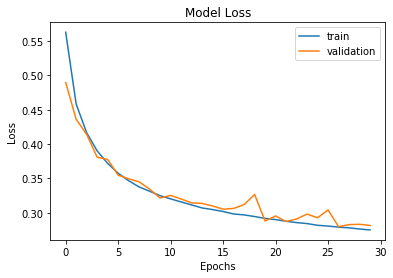

In [15]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

Again ,we use `history1` object to show the training and validation accuracy plot .

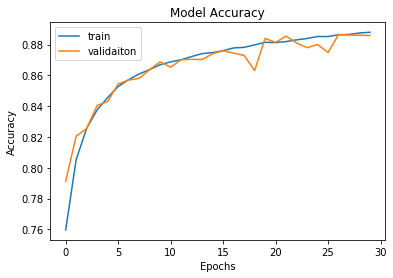

In [16]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validaiton'])
plt.show()

## Evaluate our model acuuracy
 Let us use the test data `test_x`and `test_y` to evaluate our model.


We can get loss and accuracy from this.

hint : we  use `model.evaluate(x,y)` to get loss and accuracy

In [18]:
### START CODE HERE ###
loss, accuracy = model.evaluate(test_x, test_y)
### END CODE HERE ###
print('test loss:', loss, '\n Test accuracy:', accuracy) 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Training accuracy: 0.2842017861082156 
 Test accuracy: 0.8847438


## Build your own model

Try different learning rate or optimizer (etc. Stochastic gradient descent(SGD), Momentum, Adam). 

You can learn more about the usage of optimizer in Keras [here](https://keras.io/zh/optimizers/).

Build the model, and plot the loss of train&validation set. Does it perform better? Does it perform as well in test set?

In [ ]:
def build_model2(input_dim,learning_rate):
    
    
    model = keras.Sequential([
        layers.Dense(___, activation=___, input_shape=(input_dim,)),  

        
        ### START CODE HERE ### 

        ### END CODE HERE ###
        
        keras.layers.Dense(7, activation=  'softmax')
  ])
    optimizer =  
    
    model.compile(optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

## Inspect the model

Use the `.summary` method to print a simple description of the model

In [ ]:
model.summary()

## Set the input dimension and learning rate

In order to use our model function, we have to set input dimension and learning rate

-  Input dimension : eature number of training set
-  Learning rate : learning rate of the gradient descent update rule


Here, you can fine-tune  learning rate to   train the network.

In [ ]:
### START CODE HERE ###
### hint: feature number of training set
dim =
### END CODE HERE ###
learning_rate=

model = build_model2(input_dim=dim,learning_rate=learning_rate)

## Train the model
Train the model , and record the training and validation accuracy in the `history2` object.

You can adjust the `epochs` and `batch_size`  


In [ ]:

### START CODE HERE ###
history2 = model.fit(
 train_x, train_y,
 epochs= 30, batch_size = 50,
 ,validation_split = 0.2)
### END CODE HERE ###

## Show the training and validation loss and accuracy plots
We use `history2` object to show the training and validation loss plot .## Show the training and validation loss plot 

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

Again ,we use `history2` object to show the training and validation accuracy plot .

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validaiton'])
plt.show()

## Evaluate our model acuuracy
 Let us use the test data `test_x`and `test_y` to evaluate our model.


We can get loss and accuracy from this.

hint : we  use `model.evaluate(x,y)` to get loss and accuracy

In [ ]:
### START CODE HERE ###
loss, accuracy = model.evaluate(test_x, test_y) ## hint :  model.evaluate(x,y)
### END CODE HERE ###
print('test loss:', loss, '\n Test accuracy:', accuracy) 